In [30]:
import random

import cv2
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np

import albumentations as A
import random
random.seed(30)

In [87]:
import os, os.path

DIR = '../UTKfaceCut/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

DIR = '../Data_Aggregated/'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

23711
7201


In [43]:
data = pd.read_excel('UTKface_inthewild_annotated.xlsx')
no_race_classes = data.Race.unique().size
max_age = 116

data.head()


data2 = pd.read_excel('full_data_meta_annotated.xlsx')

data2.head()

,file_name,image_height,image_width,Age,Gender,Race,Emotion,hair_color,Glasses,hijab,niqab,beard,Moustache,Mask,hat,headband
0,black_bearded_0.jpeg,275,183,28,0,4,1.0,1.0,1,0,0,1,1,0,0,0
1,black_bearded_1.jpg,182,141,28,0,0,0.0,1.0,0,0,0,1,1,0,0,0
2,black_bearded_10.jpg,111,87,25,0,1,0.0,1.0,1,0,0,1,1,0,0,0
3,black_bearded_100.jpg,191,173,28,0,4,0.0,1.0,0,0,0,1,1,0,0,0
4,black_bearded_101.517.jpg,140,118,25,0,4,1.0,1.0,0,0,0,1,1,0,0,0


In [62]:

print(len(data))

delet=['1_0_2_20161219161843718.jpg','2_0_4_20161221192934773.jpg','2_1_1_20170116231935539.jpg','5_1_0_20170117184912795.jpg','2_0_4_20161221192934773.jpg','2_1_1_20170116231935539.jpg','5_0_1_20170117193745507.jpg','5_0_3_20161220221842826.jpg','5_1_0_20170117184912795.jpg','1_0_2_20161219203439924.jpg','1_0_2_20161219212648582.jpg']

for i in delet:
    data.drop(data.loc[data['file_name']==i].index, inplace=True)
    
data = data.reset_index(drop = True) 

print(len(data))
# data.file_name = '../UTKface/'+ data.file_name

msk = np.random.rand(len(data)) < 0.8
train = data[msk]
train = train.reset_index(drop = True) 

valid = data[~msk]
valid = valid.reset_index(drop = True) 


print('train',len(train))
print('valid',len(valid))

24050
24042
train 19252
valid 4790


In [63]:
# train.to_csv('train.csv',index=False)
valid.to_csv('valid_new.csv',index=False)


In [64]:
train.Age.min(), train.Age.max()

(1, 116)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6342b27dd8>,
      dtype=object)

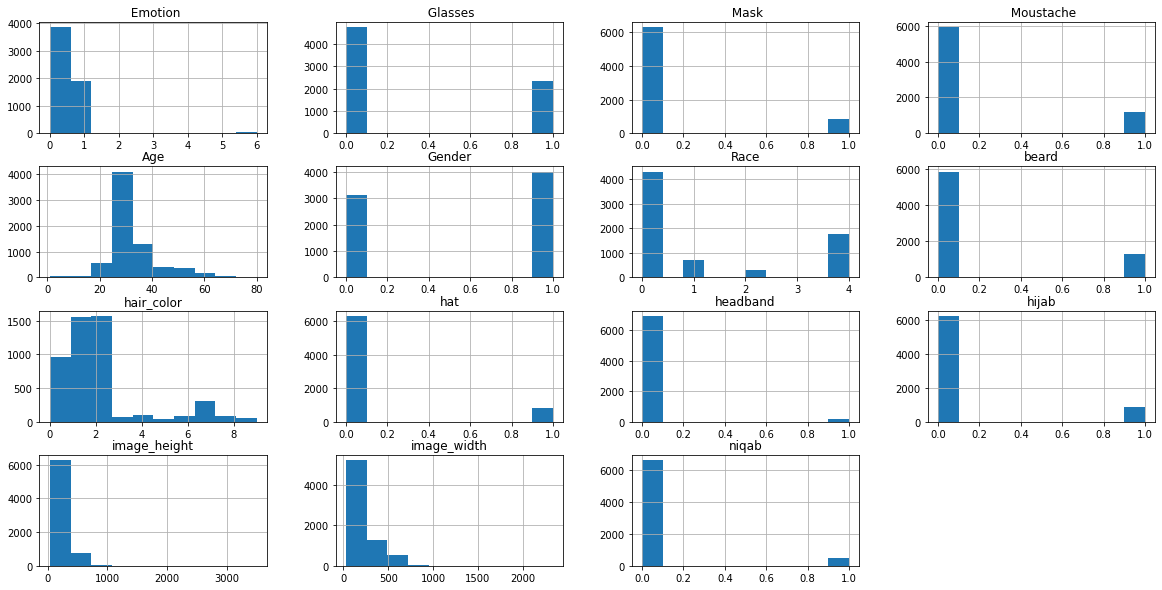

In [45]:
data2.hist(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6341180e80>,
      dtype=object)

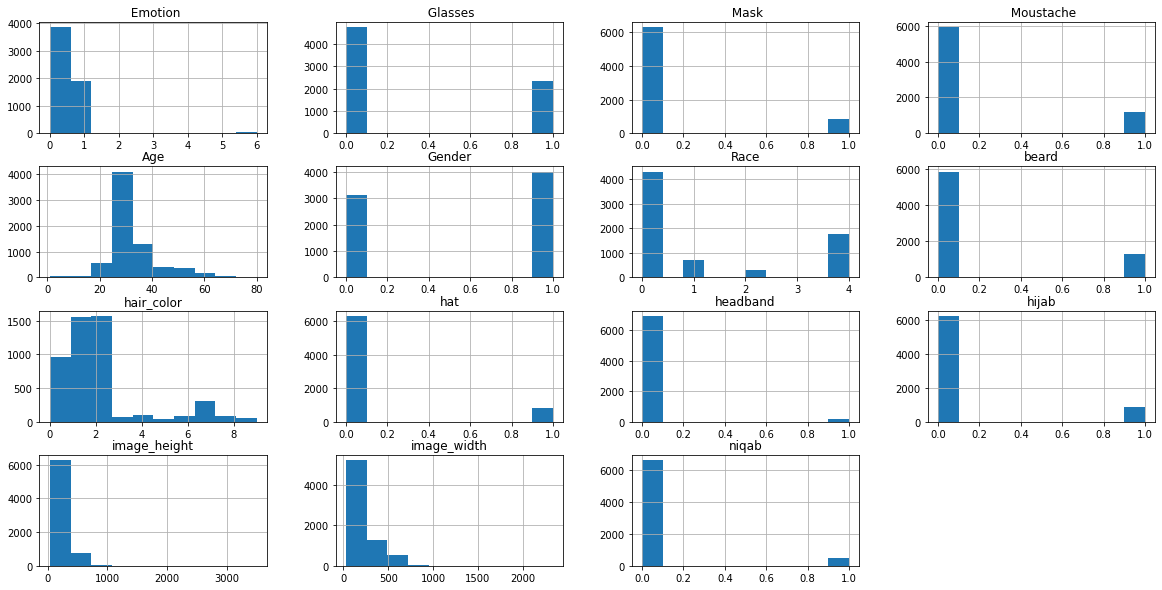

In [46]:
data2.hist(figsize=(20,10))

In [67]:
# df['age_5y_lable'] = (df.age//5).astype('int')
bin_edges = list(range(0,125,5))
bin_lables = list(range(0, len(bin_edges)-1))

train['age_fixed_5y_lable'] = pd.cut(np.array(train['Age']), bins=bin_edges, labels=bin_lables)
train['age_fixed_5y_range'] = pd.cut(np.array(train['Age']), bins=bin_edges)
train.head()

,file_name,Age,Gender,Race,Emotion,Hair Color,Glasses,Hijab,Niqab,Beard,Moustache,Mask,Hat,Headband,Makeup,age_fixed_5y_lable,age_fixed_5y_range
0,100_0_0_20170112213500903.jpg,100,0,0,1.0,0.0,0,0,0,0,1,0,0,0,0,19,"(95, 100]"
1,100_1_0_20170110183726390.jpg,100,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,19,"(95, 100]"
2,100_1_0_20170112213001988.jpg,100,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,19,"(95, 100]"
3,100_1_0_20170112213303693.jpg,100,1,0,0.0,0.0,0,0,0,0,0,0,0,0,0,19,"(95, 100]"
4,100_1_0_20170112215032192.jpg,100,1,0,0.0,0.0,1,0,0,0,0,0,0,0,0,19,"(95, 100]"


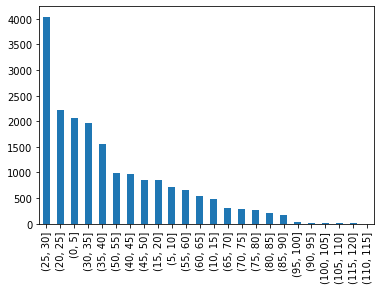

In [68]:
pd.value_counts(train['age_fixed_5y_range']).plot.bar()

In [69]:
pd.value_counts(train['age_fixed_5y_range'])

(25, 30]      4043
(20, 25]      2217
(0, 5]        2072
(30, 35]      1967
(35, 40]      1564
(50, 55]       989
(40, 45]       967
(45, 50]       859
(15, 20]       854
(5, 10]        718
(55, 60]       651
(60, 65]       537
(10, 15]       489
(65, 70]       314
(70, 75]       292
(75, 80]       268
(80, 85]       217
(85, 90]       166
(95, 100]       28
(90, 95]        21
(100, 105]       7
(105, 110]       6
(115, 120]       4
(110, 115]       2
Name: age_fixed_5y_range, dtype: int64

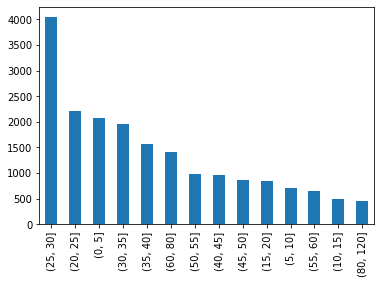

In [70]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 120]
bin_lables = list(range(0, len(bin_edges)-1))

train['Age_bin_custom_label'] = pd.cut(np.array(train['Age']), bins=bin_edges, labels=bin_lables)
train['Age_bin_custom_range'] = pd.cut(np.array(train['Age']), bins=bin_edges)
pd.value_counts(train['Age_bin_custom_range']).plot.bar()

In [71]:
def MultiplicativeNoise(image,t=3):
    images=[]
    if t>=1:
        imagea=A.MultiplicativeNoise(multiplier=0.5, p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.MultiplicativeNoise(multiplier=1.5, p=1)(image=image)['image']
        images.append(imagea)
    if t>=3:
        imagea=A.MultiplicativeNoise(multiplier=[0.5, 1.5], per_channel=True, p=1)(image=image)['image']
        images.append(imagea)


    return  images
   

In [72]:
def Cutout(image,t=5):
    images=[]
    if t>=1:
        imagea=A.Cutout(num_holes=8, max_h_size=8, max_w_size=8, fill_value=0, p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.Cutout(num_holes=10, max_h_size=8, max_w_size=8, fill_value=0, p=1)(image=image)['image']
        images.append(imagea)
    if t>=3:
        imagea=A.Cutout(num_holes=30, max_h_size=8, max_w_size=8, fill_value=64, p=1)(image=image)['image']
        images.append(imagea)
    if t>=4:
        imagea=A.Cutout(num_holes=50, max_h_size=8, max_w_size=8, fill_value=128, p=1)(image=image)['image']
        images.append(imagea)
    if t>=5:
        imagea=A.Cutout(num_holes=100, max_h_size=8, max_w_size=8, fill_value=255, p=1)(image=image)['image']
        images.append(imagea)
    
    return  images
   

In [73]:
def HorizontalFlip(image,t=1):
    images=[]
    
    imagea=A.HorizontalFlip(p=1)(image=image)['image']
    images.append(imagea)
 
    
    return  images
   

In [74]:
def Blur(image,t=3):
    images=[]
    if t>=1:
        imagea=A.Blur(blur_limit=(7, 7), p=1)(image=image)['image']
        images.append(imagea)
    if t>=2:
        imagea=A.Blur(blur_limit=(8, 8), p=1)(image=image)['image']
        images.append(imagea)

    if t>=3:
        imagea=A.Blur(blur_limit=(10, 10), p=1)(image=image)['image']
        images.append(imagea)
    
    
    return  images

In [75]:
df_r=pd.value_counts(train['Age_bin_custom_range']).rename_axis('Age_bin_custom_range').reset_index(name='counts')
df_r

,Age_bin_custom_range,counts
0,"(25, 30]",4043
1,"(20, 25]",2217
2,"(0, 5]",2072
3,"(30, 35]",1967
4,"(35, 40]",1564
5,"(60, 80]",1411
6,"(50, 55]",989
7,"(40, 45]",967
8,"(45, 50]",859
9,"(15, 20]",854


In [152]:
df_au=train[(train['Age']>25.0) & (train['Age']<=30.0)]
(4071/len(df_au))-1

0.006925550333910513

In [148]:
b=1
m=2
c=4
c+m+b+1

8

In [153]:
data=[]
for index, row in df_au.iterrows():
    data.append({'img_path':'../UTKfaceCut/'+row['file_name']
                 ,'age':row['Age']
                 ,'gender':row['Gender']
                 ,'race':row['Race'] })
    
#     image = cv2.imread('../UTKfaceCut/'+row['file_name'])
#     augmented_images = HorizontalFlip(image,6)
    
#     path='./../UTKface_aum/'+os.path.split(row['file_name'])[1]
#     psave=path+'.aug.HorizontalFlip.0.jpg'
#     cv2.imwrite(psave,augmented_images[0])
#     data.append({'img_path':psave
#              ,'age':row['Age']
#              ,'gender':row['Gender']
#              ,'race':row['Race'] })


#     augmented_images = Cutout(image,c)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.Cutout.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['Age']
#          ,'gender':row['Gender']
#          ,'race':row['Race'] })

#     augmented_images = MultiplicativeNoise(image,m)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.MultiplicativeNoise.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['Age']
#          ,'gender':row['Gender']
#          ,'race':row['Race'] })
        
#     augmented_images = Blur(image,b)
#     for i in range(len(augmented_images)):
#         psave=path+'.aug.Blur.'+str(i)+'.jpg'
#         cv2.imwrite(psave,augmented_images[i])
#         data.append({'img_path':psave
#          ,'age':row['Age']
#          ,'gender':row['Gender']
#          ,'race':row['Race'] })
dfObj = pd.DataFrame(data, columns = ['img_path' , 'age', 'gender' , 'race']) 

In [154]:
dfall = pd.concat((dfall, dfObj))

In [155]:
len(dfObj),len(dfall)

(4043, 55623)

In [163]:
dfall.to_csv('trainAug.csv',index=False)

In [164]:
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 120]
bin_lables = list(range(0, len(bin_edges)-1))

dfall['Age_bin_custom_label'] = pd.cut(np.array(dfall['age']), bins=bin_edges, labels=bin_lables)
dfall['Age_bin_custom_range'] = pd.cut(np.array(dfall['age']), bins=bin_edges)

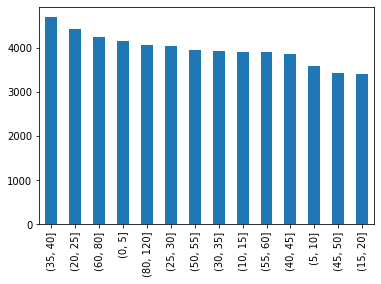

In [165]:
pd.value_counts(dfall['Age_bin_custom_range']).plot.bar()

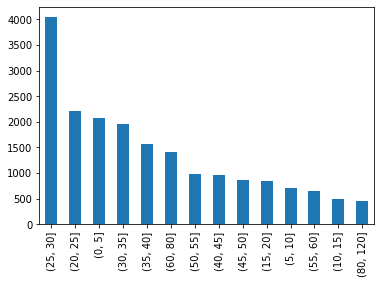

In [159]:
pd.value_counts(train['Age_bin_custom_range']).plot.bar()

In [31]:
dfall=pd.read_csv('trainAug.csv')
dfall

,img_path,age,gender,race,Age_bin_custom_label,Age_bin_custom_range
0,../UTKfaceCut/21_0_0_20170103223223127.jpg,21,0,0,4,"(20, 25]"
1,./../UTKface_aum/21_0_0_20170103223223127.jpg....,21,0,0,4,"(20, 25]"
2,../UTKfaceCut/21_0_0_20170103234805676.jpg,21,0,0,4,"(20, 25]"
3,./../UTKface_aum/21_0_0_20170103234805676.jpg....,21,0,0,4,"(20, 25]"
4,../UTKfaceCut/21_0_0_20170104020830476.jpg,21,0,0,4,"(20, 25]"
...,...,...,...,...,...,...
55618,../UTKfaceCut/30_1_4_20170117203004549.jpg,30,1,4,5,"(25, 30]"
55619,../UTKfaceCut/30_1_4_20170117203006317.jpg,30,1,4,5,"(25, 30]"
55620,../UTKfaceCut/30_1_4_20170117203009657.jpg,30,1,4,5,"(25, 30]"
55621,../UTKfaceCut/57_0_3_20170117172459410.jpg,30,0,3,5,"(25, 30]"


In [54]:
data2.head()

,file_name,image_height,image_width,Age,Gender,Race,Emotion,hair_color,Glasses,hijab,niqab,beard,Moustache,Mask,hat,headband
0,black_bearded_0.jpeg,275,183,28,0,4,1.0,1.0,1,0,0,1,1,0,0,0
1,black_bearded_1.jpg,182,141,28,0,0,0.0,1.0,0,0,0,1,1,0,0,0
2,black_bearded_10.jpg,111,87,25,0,1,0.0,1.0,1,0,0,1,1,0,0,0
3,black_bearded_100.jpg,191,173,28,0,4,0.0,1.0,0,0,0,1,1,0,0,0
4,black_bearded_101.517.jpg,140,118,25,0,4,1.0,1.0,0,0,0,1,1,0,0,0


In [47]:
import plotly.graph_objects as go


In [88]:
def plot_distribution(pd_series,labels=None):
    if  not labels:
        labels = pd_series.value_counts().index.tolist()
    counts = pd_series.value_counts().values.tolist()
    print(labels)
    pie_plot = go.Pie(labels=labels, values=counts, hole=.3)
    fig = go.Figure(data=[pie_plot])
    fig.update_layout(title_text='Distribution for %s' % pd_series.name)
    
    fig.show()

['White', 'Black', 'Asian', 'Indian', 'Others']


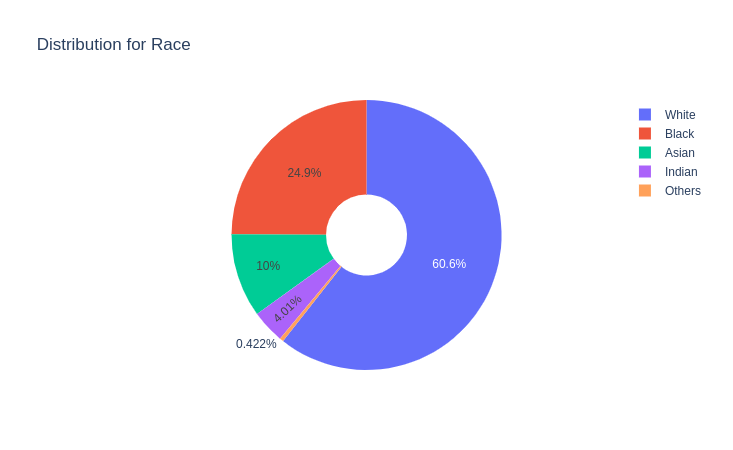

In [89]:
plot_distribution(data2['Race'],['White', 'Black', 'Asian', 'Indian', 'Others'])


[1, 0]


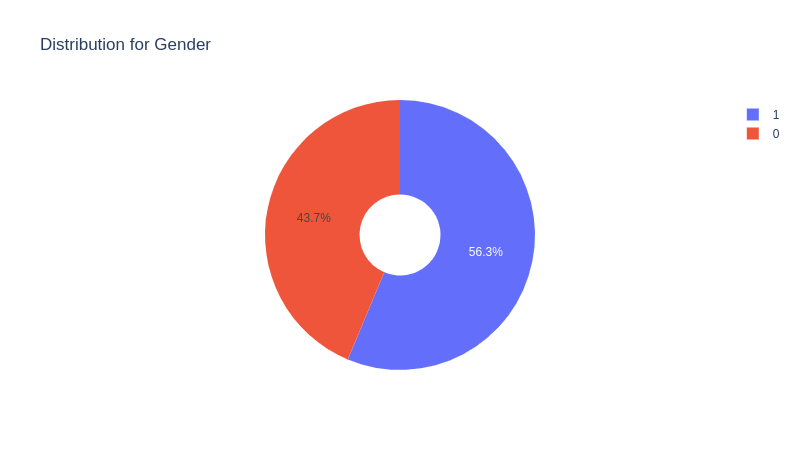

In [86]:
plot_distribution(data2['Gender'])


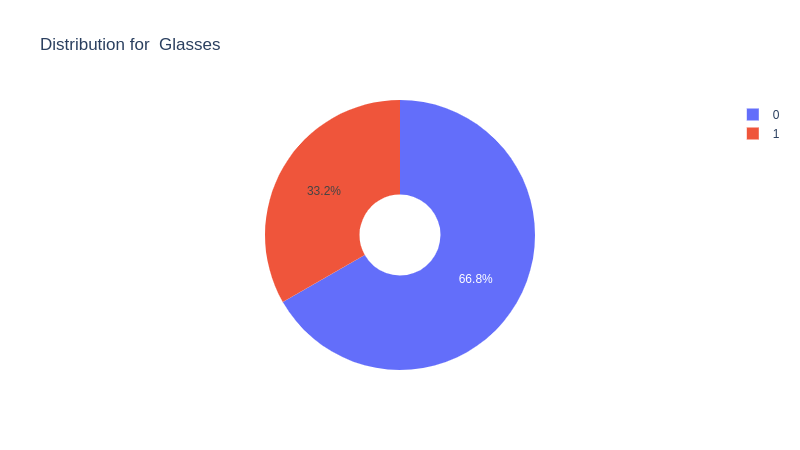

In [71]:
plot_distribution(data2[' Glasses'])


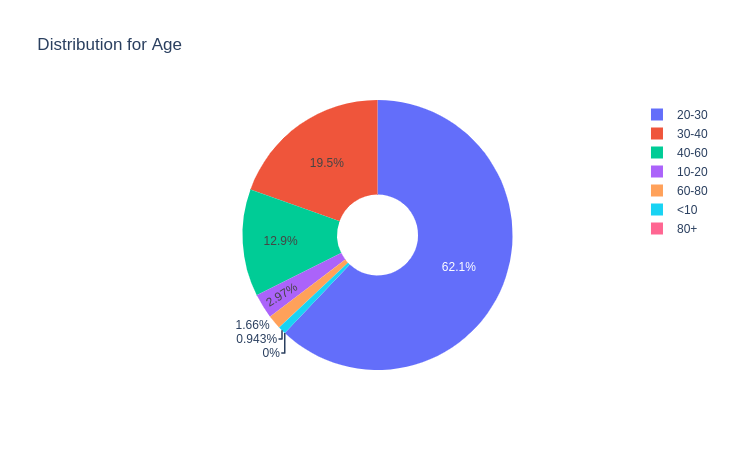

In [72]:
bins = [0, 10, 20, 30, 40, 60, 80, np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-60', '60-80', '80+']
age_binned = pd.cut(data2['Age'], bins, labels=names)
plot_distribution(age_binned)

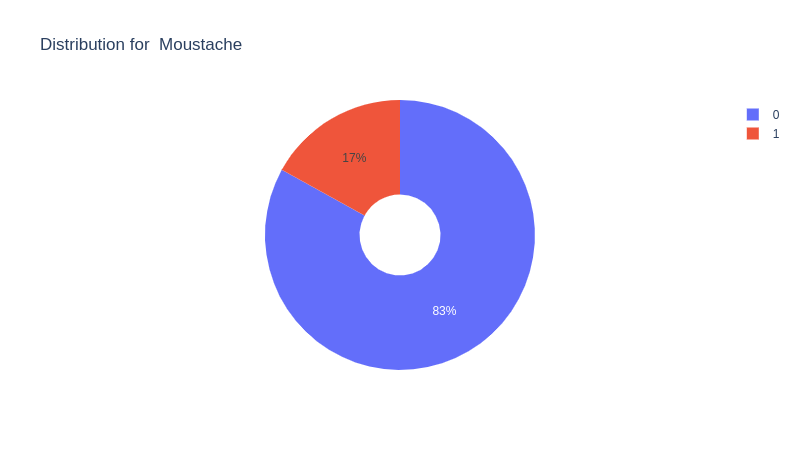

In [73]:
plot_distribution(data2[' Moustache'])

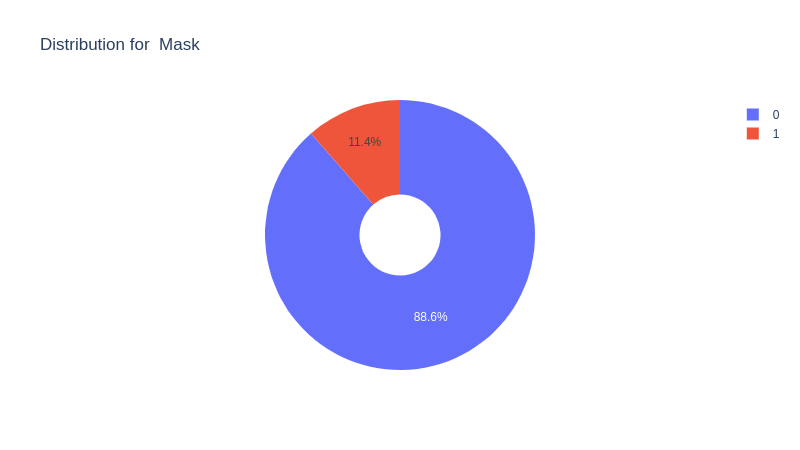

In [74]:
plot_distribution(data2[' Mask'])

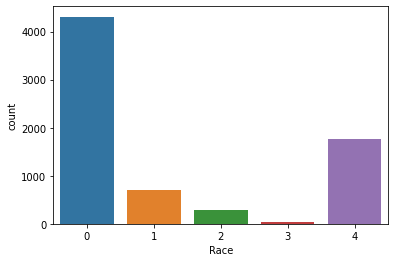

In [77]:
import seaborn as sns

data2['Race'].value_counts()
sns.countplot(data2['Race'][data2['Race'] == data2['Race']])
plt.show()

In [80]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique([0,1,2,3,4]),
                                                 data2['Race'])

In [81]:
class_weights

array([ 0.32986772,  1.99634831,  4.98736842, 47.38      ,  0.8025974 ])

In [5]:
import keras    
import numpy as np
import tensorflow as tf

# You could actually make it a lambda function as well
def weighted_crossentropy(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(
        labels,
        logits,
        weights=tf.abs(tf.argmax(logits, axis=1) - tf.argmax(labels, axis=1)),
    )


model = keras.models.Sequential(
    [
        keras.layers.Dense(32, input_shape=(10,)),
        keras.layers.Activation("relu"),
        keras.layers.Dense(10),
        keras.layers.Activation("relu"),
        keras.layers.Dense(5),
    ]
)



Using TensorFlow backend.


In [8]:
data = np.random.random((32, 10))
labels = keras.utils.to_categorical(np.random.randint(5, size=(32, 1)))


In [14]:
def weighted_crossentropy(labels, logits):
    return tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels,
        logits),
    


In [15]:
weighted_crossentropy(labels, labels)

ValueError: Rank mismatch: Rank of labels (received 2) should equal rank of logits minus 1 (received 2).

In [107]:
model.compile(optimizer="rmsprop", loss=weighted_crossentropy)
model.fit(data, labels, batch_size=32)

TypeError: in user code:

    /home/ai/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    <ipython-input-105-e4a09b28bd0a>:4 weighted_crossentropy  *
        logits,
    /home/ai/.local/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py:201 wrapper  **
        return target(*args, **kwargs)

    TypeError: sparse_categorical_crossentropy() got an unexpected keyword argument 'weights'
